# Exploratory Data Analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import math
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA


import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv("/content/drive/MyDrive/Python Files DataJarLabs/StudentsPerformance.csv")
dfo=df
#Orjinal veriyi dfo olarak ayırdım.

df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [ ]:
print(df.describe())
print(df.info())
print(df.isnull().sum()*100/df.shape[0])

       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   re

In [ ]:
#Görüldüğü üzere Null değerler veya Variable Type'larda bir sıkıntı gözükmüyor. Aykırı değerler için işlemlere geçebiliriz.

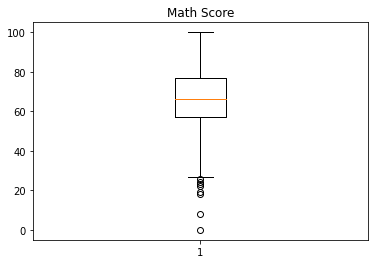

In [ ]:
plt.boxplot(df["math score"])
plt.title("Math Score")
plt.show()

In [ ]:
from scipy.stats import zscore
z_scores = zscore(df["math score"])
for threshold in range(1,5):
    print("Eşik değeri: {}".format(threshold))
    print("Aykırı değerlerin sayısı: {}".format(len((np.where(z_scores > threshold)[0]))))
    print('------')


Eşik değeri: 1
Aykırı değerlerin sayısı: 154
------
Eşik değeri: 2
Aykırı değerlerin sayısı: 19
------
Eşik değeri: 3
Aykırı değerlerin sayısı: 0
------
Eşik değeri: 4
Aykırı değerlerin sayısı: 0
------


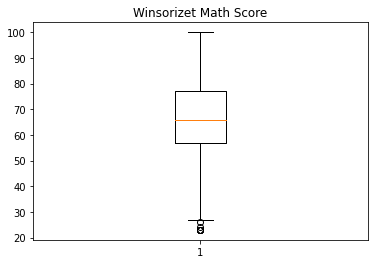

In [ ]:
df["Winsorized Math Score"] = winsorize(df["math score"], (0.005, 0))

plt.boxplot(df["Winsorized Math Score"])
plt.title("Winsorizet Math Score",)
plt.show()


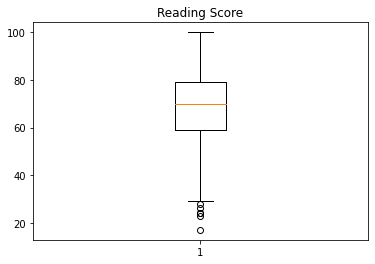

In [ ]:
plt.boxplot(df["reading score"])
plt.title("Reading Score")
plt.show()

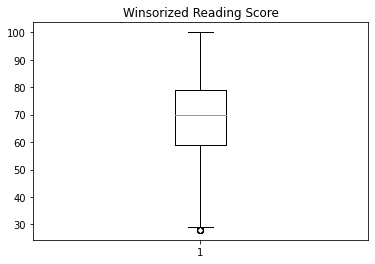

In [ ]:
df["Winsorized Reading Score"] = winsorize(df["reading score"], (0.005, 0))

plt.boxplot(df["Winsorized Reading Score"])
plt.title("Winsorized Reading Score",)
plt.show()

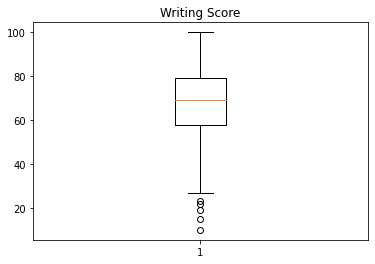

In [ ]:
plt.boxplot(df["writing score"])
plt.title("Writing Score")
plt.show()

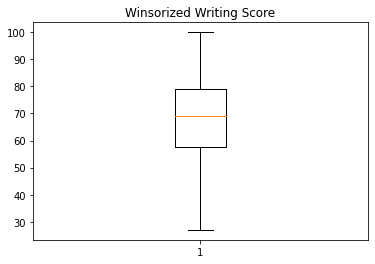

In [ ]:
df["Winsorized Writing Score"] = winsorize(df["writing score"], (0.005, 0))

plt.boxplot(df["Winsorized Writing Score"])
plt.title("Winsorized Writing Score",)
plt.show()

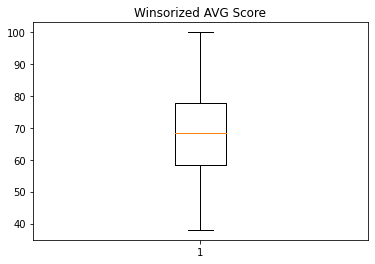

In [ ]:
df['AVG SCORE'] = df[['math score',"reading score",'writing score']].mean(axis=1)

df["Winsorized AVG Score"] = winsorize(df["AVG SCORE"], (0.02, 0))

plt.boxplot(df["Winsorized AVG Score"])
plt.title("Winsorized AVG Score",)
plt.show()

# Visualization

In [ ]:
group_gender = df.groupby("gender")
group_gender.describe()

math score                        ... Winsorized AVG Score                  
            count       mean        std  ...                  50%        75%    max
gender                                   ...                                       
female      518.0  63.633205  15.491453  ...            70.333333  78.666667  100.0
male        482.0  68.728216  14.356277  ...            66.333333  76.250000  100.0

[2 rows x 64 columns]

In [ ]:
fig = px.histogram(df, x="Winsorized AVG Score", color='gender',marginal='box',color_discrete_map={"male": "SteelBlue", "female": "LightCoral"},title=" AVG Score by Gender")
fig.show()


In [ ]:
group_race = df.groupby("parental level of education")
group_race.describe()

math score             ... Winsorized AVG Score            
                                 count       mean  ...                  75%         max
parental level of education                        ...                                 
associate's degree               222.0  67.882883  ...            79.000000  100.000000
bachelor's degree                118.0  69.389831  ...            80.666667  100.000000
high school                      196.0  62.137755  ...            72.666667   95.666667
master's degree                   59.0  69.745763  ...            85.500000   97.666667
some college                     226.0  67.128319  ...            78.000000   99.000000
some high school                 179.0  63.497207  ...            76.500000   99.000000

[6 rows x 64 columns]

In [ ]:
group_race.mean()

,math score,reading score,writing score,Winsorized Math Score,Winsorized Reading Score,Winsorized Writing Score,AVG SCORE,Winsorized AVG Score
parental level of education,,,,,,,,
associate's degree,67.882883,70.927928,69.896396,67.882883,70.927928,69.896396,69.569069,69.597598
bachelor's degree,69.389831,73.000000,73.381356,69.389831,73.000000,73.381356,71.923729,71.923729
high school,62.137755,64.704082,62.448980,62.214286,64.744898,62.530612,63.096939,63.403061
master's degree,69.745763,75.372881,75.677966,69.745763,75.372881,75.677966,73.598870,73.598870
some college,67.128319,69.460177,68.840708,67.150442,69.482301,68.876106,68.476401,68.657817
some high school,63.497207,66.938547,64.888268,63.653631,67.011173,65.011173,65.108007,65.513966


In [ ]:
fig = px.bar(data_frame=group_race.mean(), 
             x=group_race.mean().index, 
             y='Winsorized AVG Score',title=" Winsorized AVG Score by Parental Education")
fig.show()

In [ ]:
group_parent = df.groupby("race/ethnicity")
group_parent.describe()

math score             ... Winsorized AVG Score            
                    count       mean  ...                  75%         max
race/ethnicity                        ...                                 
group A              89.0  61.629213  ...            73.000000   96.333333
group B             190.0  63.452632  ...            76.833333   96.666667
group C             319.0  64.463950  ...            77.000000   98.666667
group D             262.0  67.362595  ...            78.583333   99.000000
group E             140.0  73.821429  ...            82.416667  100.000000

[5 rows x 64 columns]

In [ ]:
fig = px.bar(data_frame=group_parent.mean(), 
             x=group_parent.mean().index, 
             y='Winsorized AVG Score',title=" Winsorized AVG Score by Race")
fig.show()

In [ ]:
testpre = df.groupby("test preparation course")
testpre.describe()

math score             ... Winsorized AVG Score       
                             count       mean  ...                  75%    max
test preparation course                        ...                            
completed                    358.0  69.695531  ...            82.166667  100.0
none                         642.0  64.077882  ...            75.000000  100.0

[2 rows x 64 columns]

In [ ]:
fig = px.bar(data_frame=testpre.mean(), 
             x=testpre.mean().index, 
             y='Winsorized AVG Score',title=" Winsorized AVG Score by test preparation course")
fig.show()

In [ ]:
lunchgroup = df.groupby("lunch")
lunchgroup.describe()

math score                        ... Winsorized AVG Score                       
                  count       mean        std  ...                  50%        75%         max
lunch                                          ...                                            
free/reduced      355.0  58.921127  15.159956  ...            62.666667  72.500000   97.666667
standard          645.0  70.034109  13.653501  ...            71.333333  79.666667  100.000000

[2 rows x 64 columns]

In [ ]:
fig = px.bar(data_frame=lunchgroup.mean(), 
             x=lunchgroup.mean().index, 
             y='Winsorized AVG Score',title="Winsorized AVG Score by Lunch Type")
fig.show()

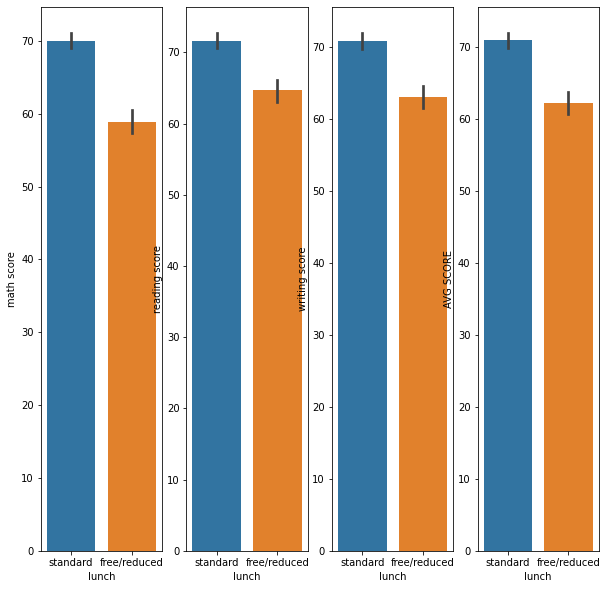

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1,4,1)
sns.barplot(df["lunch"], df["math score"])

plt.subplot(1,4,2)
sns.barplot(df["lunch"], df["reading score"])

plt.subplot(1,4,3)
sns.barplot(df["lunch"], df["writing score"])

plt.subplot(1,4,4)
sns.barplot(df["lunch"], df["AVG SCORE"])
plt.show()

#For standart lunch type AVG Score is higher. Especially in math score. 

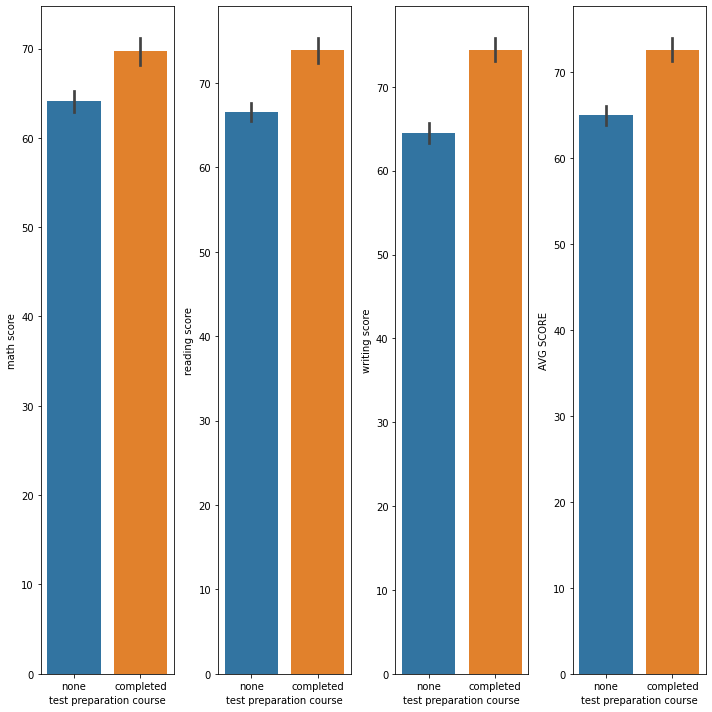

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1,4,1)
sns.barplot(df["test preparation course"], df["math score"])

plt.subplot(1,4,2)
sns.barplot(df["test preparation course"], df["reading score"])

plt.subplot(1,4,3)
sns.barplot(df["test preparation course"], df["writing score"])

plt.subplot(1,4,4)
sns.barplot(df["test preparation course"], df["AVG SCORE"])
plt.tight_layout()
plt.show()


In [ ]:
fig = go.Figure()

fig.add_trace(go.Box(y=df["reading score"],x=df["gender"],name='Reading Score',marker_color = 'blue'))
fig.add_trace(go.Box(y=df["writing score"],x=df["gender"], name = 'Writing Score',marker_color = 'lightseagreen',))
fig.add_trace(go.Box(y=df["math score"],x=df["gender"], name = 'Math Score',marker_color = 'indianred',))
fig.update_layout(
    yaxis_title='Scores',
    boxmode='group')
fig.show()

In [ ]:
fig = px.box(df, y="AVG SCORE", x="race/ethnicity",color="gender",
             title='<b> Average score vs Race<b> ',
             width=650,height=450,
             category_orders={ 
            "race/ethnicity": ["group A", "group B", "group C", "group D", "group E"]},
             color_discrete_map={ 
             "male": "SteelBlue", "female": "LightCoral"}             
            )

fig.show()

In [ ]:
df_scores =df[['Winsorized Math Score', 'Winsorized Writing Score', 'Winsorized Reading Score']]

fig = ff.create_scatterplotmatrix(df_scores, diag='histogram', colormap='Cividis',height=1000, width=1000)
fig.update_layout(title="Students Test Scores",)
fig.show()

In [ ]:
templates  = ["plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white", "none"]

fig = px.density_contour(df, x="math score", y="reading score", color="gender",trendline="ols",
                 marginal_x="histogram", marginal_y="histogram",
                 #hover_data=['race/ethnicity'],
                         width=600,height=600,
                 title= '<b> Math vs Reading <b>',
                 template="simple_white",
                        color_discrete_map={ 
                    "male": "SteelBlue", "female": "LightCoral"
                },
                        )
fig.layout.update(titlefont={'color': 'black', 'size': 24},
                  paper_bgcolor='#ececec',
                  plot_bgcolor='#ececec',
                 )
fig.show()

#######


fig =px.density_contour(df, x="math score", y="writing score", color="gender",trendline="ols",
                 marginal_x="histogram", marginal_y="histogram",
                 #hover_data=['race/ethnicity'],
                        width=600,height=600,
                 title= '<b> Math vs Writing <b>',
                 template="simple_white",
                       color_discrete_map={ 
                    "male": "SteelBlue", "female": "LightCoral"
                },
                       )
fig.layout.update(titlefont={'color': 'black', 'size': 24},
                  paper_bgcolor='#ececec',
                  plot_bgcolor='#ececec',
                 )
fig.show()

######
fig = px.density_contour(df, x="reading score", y="writing score", color="gender",trendline="ols",
                 marginal_x="histogram", marginal_y="histogram",
                 #hover_data=['race/ethnicity'],
                         width=600,height=600,
                 title= '<b> Reading vs Writing <b>',
                 template="simple_white", 
                               color_discrete_map={ 
                    "male": "SteelBlue", "female": "LightCoral"
                },
                        )
fig.layout.update(titlefont={'color': 'black', 'size': 24},
                  paper_bgcolor='#ececec',
                  plot_bgcolor='#ececec',
                 )
fig.show()

In [ ]:
fig = px.scatter_3d(df, x='reading score', y='writing score', z='math score',
              color='gender',color_discrete_map={
                "female": "red",
                "male": "blue"},opacity=0.5)
fig.show()


In [ ]:
data = go.Scatter3d(x = df['reading score'],
                    y = df['writing score'],
                    z = df['math score'],
                    mode='markers', marker=dict(color=df['AVG SCORE'],
                                                colorscale='Viridis',
                                                showscale=True,
                                                colorbar=dict(title='AVG SCORE'),
                                                opacity = 0.8))

layout = go.Layout(title=dict(text='Scores',
                              y = 0.9,
                              x = 0.5,
                              xanchor= 'center',
                              yanchor= 'top'),
                   scene = dict(xaxis = dict(title='Reading Score'),
                                yaxis = dict(title = 'Writing Score'),
                                zaxis = dict(title='Math Score')),
                   template='plotly_white')

fig = go.Figure(data=data,layout=layout)
fig.show()

# Feature Engineering

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Winsorized Math Score,Winsorized Reading Score,Winsorized Writing Score,AVG SCORE,Winsorized AVG Score
0,female,group B,bachelor's degree,standard,none,72,72,74,72,72,74,72.666667,72.666667
1,female,group C,some college,standard,completed,69,90,88,69,90,88,82.333333,82.333333
2,female,group B,master's degree,standard,none,90,95,93,90,95,93,92.666667,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,47,57,44,49.333333,49.333333
4,male,group C,some college,standard,none,76,78,75,76,78,75,76.333333,76.333333


In [ ]:
df["race/ethnicity"].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [ ]:
race = df["race/ethnicity"].unique()

for var in ["Winsorized Math Score", "Winsorized Reading Score", "Winsorized Writing Score","Winsorized AVG Score"]:
    karsilastirma = pd.DataFrame(columns=['grup_1', 'grup_2','istatistik', 'p_degeri'])
    print("{} için karşılaştırma".format(var),end='')
    for i in range(0, len(race)):
        for j in range(i+1, len(race)):
            ttest = stats.ttest_ind(df[df["race/ethnicity"]==race[i]][var], 
                                df[df["race/ethnicity"]==race[j]][var])
            grup_1 = race[i]
            grup_2 = race[j]
            istatistik = ttest[0]
            p_degeri = ttest[1]
            
            karsilastirma = karsilastirma.append({"grup_1" : grup_1 ,
                                                  "grup_2" : grup_2 ,
                                                  "istatistik": istatistik , 
                                                  "p_degeri" : p_degeri}, ignore_index=True)
    display(karsilastirma)


Winsorized Math Score için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,group B,group C,-0.709318,4.784535e-01
1,group B,group A,1.018114,3.095120e-01
2,group B,group D,-2.769596,5.844659e-03
3,group B,group E,-6.019290,4.687627e-09
4,group C,group A,1.666033,9.647821e-02
5,group C,group D,-2.381043,1.758606e-02
6,group C,group E,-6.153672,1.656515e-09
7,group A,group D,-3.346698,9.068636e-04
8,group A,group E,-5.936141,1.083559e-08
9,group D,group E,-4.282287,2.318764e-05


Winsorized Reading Score için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,group B,group C,-1.327182,0.185046
1,group B,group A,1.367370,0.172618
2,group B,group D,-1.921355,0.055318
3,group B,group E,-3.388825,0.000787
4,group C,group A,2.584837,0.010090
5,group C,group D,-0.770882,0.441091
6,group C,group E,-2.717061,0.006837
7,group A,group D,-3.023179,0.002686
8,group A,group E,-4.073315,0.000064
9,group D,group E,-2.022525,0.043787


Winsorized Writing Score için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,group B,group C,-1.595341,0.111259
1,group B,group A,1.482187,0.139427
2,group B,group D,-3.162170,0.001672
3,group B,group E,-3.395861,0.000768
4,group C,group A,2.864714,0.004391
5,group C,group D,-1.858700,0.063577
6,group C,group E,-2.363472,0.018522
7,group A,group D,-4.123153,0.000047
8,group A,group E,-4.241880,0.000032
9,group D,group E,-0.849621,0.396044


Winsorized AVG Score için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,group B,group C,-1.184011,2.369634e-01
1,group B,group A,1.512148,1.316363e-01
2,group B,group D,-2.638734,8.610259e-03
3,group B,group E,-4.493216,9.737002e-06
4,group C,group A,2.572269,1.045801e-02
5,group C,group D,-1.726443,8.480123e-02
6,group C,group E,-4.009722,7.098984e-05
7,group A,group D,-3.700328,2.500880e-04
8,group A,group E,-5.044503,9.306751e-07
9,group D,group E,-2.564617,1.069302e-02


In [ ]:
parent=df["parental level of education"].unique()
for var in ["Winsorized Math Score", "Winsorized Reading Score", "Winsorized Writing Score","Winsorized AVG Score"]:
    karsilastirma = pd.DataFrame(columns=['grup_1', 'grup_2','istatistik', 'p_degeri'])
    print("{} için karşılaştırma".format(var),end='')
    for i in range(0, len(parent)):
        for j in range(i+1, len(parent)):
            ttest = stats.ttest_ind(df[df["parental level of education"]==parent[i]][var], 
                                df[df["parental level of education"]==parent[j]][var])
            grup_1 = parent[i]
            grup_2 = parent[j]
            istatistik = ttest[0]
            p_degeri = ttest[1]
            
            karsilastirma = karsilastirma.append({"grup_1" : grup_1 ,
                                                  "grup_2" : grup_2 ,
                                                  "istatistik": istatistik , 
                                                  "p_degeri" : p_degeri}, ignore_index=True)
    display(karsilastirma)

Winsorized Math Score için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,bachelor's degree,some college,1.361157,0.174360
1,bachelor's degree,master's degree,-0.148682,0.881976
2,bachelor's degree,associate's degree,0.878664,0.380208
3,bachelor's degree,high school,4.235703,0.000030
4,bachelor's degree,some high school,3.175442,0.001654
5,some college,master's degree,-1.229943,0.219740
6,some college,associate's degree,-0.528027,0.597743
7,some college,high school,3.545386,0.000436
8,some college,some high school,2.365468,0.018480
9,master's degree,associate's degree,0.841123,0.400999


Winsorized Reading Score için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,bachelor's degree,some college,2.198185,2.860550e-02
1,bachelor's degree,master's degree,-1.054086,2.932968e-01
2,bachelor's degree,associate's degree,1.297797,1.952421e-01
3,bachelor's degree,high school,5.017697,8.799210e-07
4,bachelor's degree,some high school,3.392291,7.877809e-04
5,some college,master's degree,-2.889510,4.156872e-03
6,some college,associate's degree,-1.098333,2.726519e-01
7,some college,high school,3.466336,5.819771e-04
8,some college,some high school,1.695257,9.079906e-02
9,master's degree,associate's degree,2.191202,2.926415e-02


Winsorized Writing Score için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,bachelor's degree,some college,2.672352,7.892885e-03
1,bachelor's degree,master's degree,-0.999874,3.187520e-01
2,bachelor's degree,associate's degree,2.115930,3.508162e-02
3,bachelor's degree,high school,6.565213,2.167568e-10
4,bachelor's degree,some high school,4.667320,4.636861e-06
5,some college,master's degree,-3.171294,1.684405e-03
6,some college,associate's degree,-0.738890,4.603626e-01
7,some college,high school,4.507509,8.517770e-06
8,some college,some high school,2.555596,1.096679e-02
9,master's degree,associate's degree,2.781242,5.784033e-03


Winsorized AVG Score için karşılaştırma

,grup_1,grup_2,istatistik,p_degeri
0,bachelor's degree,some college,2.133199,3.361988e-02
1,bachelor's degree,master's degree,-0.759477,4.485891e-01
2,bachelor's degree,associate's degree,1.488233,1.376218e-01
3,bachelor's degree,high school,5.531141,6.738199e-08
4,bachelor's degree,some high school,3.871956,1.329946e-04
5,some college,master's degree,-2.539684,1.163043e-02
6,some college,associate's degree,-0.741415,4.588323e-01
7,some college,high school,4.135883,4.272123e-05
8,some college,some high school,2.316798,2.101537e-02
9,master's degree,associate's degree,2.008887,4.551231e-02


In [ ]:
df.head()
#Lets apply encoding before we move on.

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Winsorized Math Score,Winsorized Reading Score,Winsorized Writing Score,AVG SCORE,Winsorized AVG Score
0,female,group B,bachelor's degree,standard,none,72,72,74,72,72,74,72.666667,72.666667
1,female,group C,some college,standard,completed,69,90,88,69,90,88,82.333333,82.333333
2,female,group B,master's degree,standard,none,90,95,93,90,95,93,92.666667,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,47,57,44,49.333333,49.333333
4,male,group C,some college,standard,none,76,78,75,76,78,75,76.333333,76.333333


In [ ]:
#Applied T Test and observed the relation between the variables. I know that applying t-test for this project is pretty inappropriate. We can also apply ANOVA for this dataset

In [ ]:
df["parental level of education"].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [ ]:
df= pd.concat([pd.get_dummies(df["gender"]),pd.get_dummies(df["lunch"]),pd.get_dummies(df["race/ethnicity"]),df], axis=1)
df["test preparation course"]=df["test preparation course"].replace(to_replace=["completed","none"], value=[1,0], regex=True)
df2=df

In [ ]:
df["parental level of education"]=df["parental level of education"].replace(to_replace=["high school","some high school","some college","associate's degree","bachelor's degree","master's degree"], value=[0,1,2,3,4,5], regex=False)

In [ ]:
#I took df2 for future purposes.
#We know that we should use one-hot encoding in nominal values.
#I will try both one hot encoding and label encoding for "parental level of education" variable. I will observe the results and make a decision between them.

In [ ]:
df=df.drop(['gender', 'lunch',"race/ethnicity","male","free/reduced"], axis=1)


In [ ]:
df.head()

,female,standard,group A,group B,group C,group D,group E,parental level of education,test preparation course,math score,reading score,writing score,Winsorized Math Score,Winsorized Reading Score,Winsorized Writing Score,AVG SCORE,Winsorized AVG Score
0,1,1,0,1,0,0,0,4,0,72,72,74,72,72,74,72.666667,72.666667
1,1,1,0,0,1,0,0,2,1,69,90,88,69,90,88,82.333333,82.333333
2,1,1,0,1,0,0,0,5,0,90,95,93,90,95,93,92.666667,92.666667
3,0,0,1,0,0,0,0,3,0,47,57,44,47,57,44,49.333333,49.333333
4,0,1,0,0,1,0,0,2,0,76,78,75,76,78,75,76.333333,76.333333


In [ ]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   female                       1000 non-null   uint8  
 1   standard                     1000 non-null   uint8  
 2   group A                      1000 non-null   uint8  
 3   group B                      1000 non-null   uint8  
 4   group C                      1000 non-null   uint8  
 5   group D                      1000 non-null   uint8  
 6   group E                      1000 non-null   uint8  
 7   parental level of education  1000 non-null   int64  
 8   test preparation course      1000 non-null   int64  
 9   math score                   1000 non-null   int64  
 10  reading score                1000 non-null   int64  
 11  writing score                1000 non-null   int64  
 12  Winsorized Math Score        1000 non-null   int64  
 13  Winsorized Reading 

# Linear Modeling 1 

In [ ]:
#First of all I will apply label encoding for the "parental level of education".

In [ ]:
from sklearn import linear_model
import statsmodels.api as sm

In [ ]:
Y = df['Winsorized Math Score']
X = df[["female","standard",'test preparation course','parental level of education',"group A","group B","group C","group D","group E"]]

lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Winsorized Math Score   R-squared:                       0.252
Model:                               OLS   Adj. R-squared:                  0.246
Method:                    Least Squares   F-statistic:                     41.82
Date:                   Sun, 09 Jan 2022   Prob (F-statistic):           8.51e-58
Time:                           10:05:03   Log-Likelihood:                -3981.0
No. Observations:                   1000   AIC:                             7980.
Df Residuals:                        991   BIC:                             8024.
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          46.9853      0.879     53.481      0.000      45.261      48.709
female                         -4.9194      0.829     -5.933      0.000      -6.546      -3.292
standard                       10.7525      0.863     12.465      0.000       9.060      12.445
test preparation course         5.3374      0.862      6.193      0.000       3.646       7.029
parental level of education     1.6697      0.281      5.948      0.000       1.119       2.221
group A                         5.2759      1.192      4.427      0.000       2.937       7.615
group B                         7.4966      0.873      8.589      0.000       5.784       9.209
group C                         7.9238      0.734     10.802      0.000       6.484       9.363
group D                        10.7000      0.776     13.786      0.000       9.177      12.223
group E                        15.5889      1.007     15.479      0.000      13.613      17.565
==============================================================================
Omnibus:                        9.031   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.085
Skew:                          -0.164   Prob(JB):                       0.0176
Kurtosis:                       2.707   Cond. No.                     5.02e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.15e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
Y = df['Winsorized Writing Score']
X = df[["female","standard",'test preparation course','parental level of education',"group A","group B","group C","group D","group E"]]

lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Winsorized Writing Score   R-squared:                       0.333
Model:                                  OLS   Adj. R-squared:                  0.327
Method:                       Least Squares   F-statistic:                     61.71
Date:                      Sun, 09 Jan 2022   Prob (F-statistic):           7.88e-82
Time:                              10:05:03   Log-Likelihood:                -3927.9
No. Observations:                      1000   AIC:                             7874.
Df Residuals:                           991   BIC:                             7918.
Df Model:                                 8                                         
Covariance Type:                  nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          41.3201      0.833     49.598      0.000      39.685      42.955
female                          9.0758      0.786     11.543      0.000       7.533      10.619
standard                        8.0666      0.818      9.862      0.000       6.461       9.672
test preparation course         9.8651      0.817     12.071      0.000       8.261      11.469
parental level of education     2.2977      0.266      8.631      0.000       1.775       2.820
group A                         5.2732      1.130      4.666      0.000       3.055       7.491
group B                         6.5564      0.828      7.921      0.000       4.932       8.181
group C                         7.7684      0.696     11.168      0.000       6.403       9.134
group D                        11.2072      0.736     15.228      0.000       9.763      12.651
group E                        10.5149      0.955     11.010      0.000       8.641      12.389
==============================================================================
Omnibus:                       13.732   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.653
Skew:                          -0.262   Prob(JB):                      0.00108
Kurtosis:                       2.771   Cond. No.                     5.02e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.15e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
Y = df['Winsorized Reading Score']
X = df[["female","standard",'test preparation course','parental level of education',"group A","group B","group C","group D","group E"]]

lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Winsorized Reading Score   R-squared:                       0.227
Model:                                  OLS   Adj. R-squared:                  0.221
Method:                       Least Squares   F-statistic:                     36.34
Date:                      Sun, 09 Jan 2022   Prob (F-statistic):           1.07e-50
Time:                              10:05:03   Log-Likelihood:                -3965.4
No. Observations:                      1000   AIC:                             7949.
Df Residuals:                           991   BIC:                             7993.
Df Model:                                 8                                         
Covariance Type:                  nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          45.3181      0.865     52.396      0.000      43.621      47.015
female                          7.0761      0.816      8.669      0.000       5.474       8.678
standard                        7.1646      0.849      8.437      0.000       5.498       8.831
test preparation course         7.2550      0.848      8.551      0.000       5.590       8.920
parental level of education     1.8145      0.276      6.565      0.000       1.272       2.357
group A                         6.3926      1.173      5.448      0.000       4.090       8.695
group B                         7.7495      0.859      9.018      0.000       6.063       9.436
group C                         8.7169      0.722     12.070      0.000       7.300      10.134
group D                        10.5059      0.764     13.750      0.000       9.006      12.005
group E                        11.9532      0.991     12.056      0.000      10.008      13.899
==============================================================================
Omnibus:                       11.948   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.058
Skew:                          -0.212   Prob(JB):                      0.00397
Kurtosis:                       2.707   Cond. No.                     5.02e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.15e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
Y = df['Winsorized AVG Score']
X = df[["female","standard",'test preparation course','parental level of education',"group A","group B","group C","group D","group E"]]

lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Winsorized AVG Score   R-squared:                       0.240
Model:                              OLS   Adj. R-squared:                  0.234
Method:                   Least Squares   F-statistic:                     39.13
Date:                  Sun, 09 Jan 2022   Prob (F-statistic):           2.46e-54
Time:                          10:05:03   Log-Likelihood:                -3904.7
No. Observations:                  1000   AIC:                             7827.
Df Residuals:                       991   BIC:                             7872.
Df Model:                             8                                         
Covariance Type:              nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          44.9628      0.814     55.234      0.000      43.365      46.560
female                          3.8041      0.768      4.952      0.000       2.297       5.312
standard                        8.3710      0.799     10.473      0.000       6.803       9.939
test preparation course         7.2819      0.799      9.119      0.000       5.715       8.849
parental level of education     1.8623      0.260      7.160      0.000       1.352       2.373
group A                         5.6892      1.104      5.152      0.000       3.522       7.856
group B                         7.4958      0.809      9.268      0.000       5.909       9.083
group C                         8.2188      0.680     12.092      0.000       6.885       9.553
group D                        10.7920      0.719     15.007      0.000       9.381      12.203
group E                        12.7670      0.933     13.682      0.000      10.936      14.598
==============================================================================
Omnibus:                       22.620   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.380
Skew:                          -0.111   Prob(JB):                      0.00124
Kurtosis:                       2.478   Cond. No.                     5.02e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.15e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
df["lunch type parental level of education"]=df.standard*df["parental level of education"]
Y = df['Winsorized AVG Score']
X = df[["female","lunch type parental level of education",'test preparation course',"group A","group B","group C","group D","group E"]]

lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Winsorized AVG Score   R-squared:                       0.206
Model:                              OLS   Adj. R-squared:                  0.201
Method:                   Least Squares   F-statistic:                     36.81
Date:                  Sun, 09 Jan 2022   Prob (F-statistic):           5.94e-46
Time:                          10:05:03   Log-Likelihood:                -3926.5
No. Observations:                  1000   AIC:                             7869.
Df Residuals:                       992   BIC:                             7908.
Df Model:                             7                                         
Covariance Type:              nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     49.7981      0.607     82.019      0.000      48.607      50.990
female                                     3.5323      0.784      4.503      0.000       1.993       5.072
lunch type parental level of education     2.6820      0.257     10.438      0.000       2.178       3.186
test preparation course                    7.3228      0.815      8.982      0.000       5.723       8.923
group A                                    6.3436      1.126      5.632      0.000       4.133       8.554
group B                                    8.6135      0.821     10.486      0.000       7.002      10.225
group C                                    9.2074      0.683     13.476      0.000       7.867      10.548
group D                                   11.7978      0.723     16.312      0.000      10.378      13.217
group E                                   13.8358      0.941     14.709      0.000      11.990      15.682
==============================================================================
Omnibus:                       22.473   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.838
Skew:                          -0.132   Prob(JB):                     0.000989
Kurtosis:                       2.487   Cond. No.                     4.00e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.1e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
df["female tp course"]=df.female*df["test preparation course"]
Y = df['Winsorized AVG Score']
X = df[["standard",'female tp course','parental level of education',"group A","group B","group C","group D","group E"]]

lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Winsorized AVG Score   R-squared:                       0.209
Model:                              OLS   Adj. R-squared:                  0.203
Method:                   Least Squares   F-statistic:                     37.33
Date:                  Sun, 09 Jan 2022   Prob (F-statistic):           1.43e-46
Time:                          10:05:03   Log-Likelihood:                -3925.1
No. Observations:                  1000   AIC:                             7866.
Df Residuals:                       992   BIC:                             7905.
Df Model:                             7                                         
Covariance Type:              nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          47.5302      0.742     64.021      0.000      46.073      48.987
standard                        8.3052      0.815     10.188      0.000       6.706       9.905
female tp course                8.0080      1.008      7.948      0.000       6.031       9.985
parental level of education     1.9145      0.265      7.223      0.000       1.394       2.435
group A                         6.0597      1.126      5.383      0.000       3.851       8.269
group B                         8.0889      0.818      9.886      0.000       6.483       9.695
group C                         8.6684      0.686     12.640      0.000       7.323      10.014
group D                        10.9621      0.732     14.981      0.000       9.526      12.398
group E                        13.7510      0.945     14.550      0.000      11.896      15.606
==============================================================================
Omnibus:                       19.340   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.728
Skew:                          -0.094   Prob(JB):                      0.00284
Kurtosis:                       2.504   Cond. No.                     3.93e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.96e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
df=df.drop(["female tp course","lunch type parental level of education"], axis=1)
df

,female,standard,group A,group B,group C,group D,group E,parental level of education,test preparation course,math score,reading score,writing score,Winsorized Math Score,Winsorized Reading Score,Winsorized Writing Score,AVG SCORE,Winsorized AVG Score
0,1,1,0,1,0,0,0,4,0,72,72,74,72,72,74,72.666667,72.666667
1,1,1,0,0,1,0,0,2,1,69,90,88,69,90,88,82.333333,82.333333
2,1,1,0,1,0,0,0,5,0,90,95,93,90,95,93,92.666667,92.666667
3,0,0,1,0,0,0,0,3,0,47,57,44,47,57,44,49.333333,49.333333
4,0,1,0,0,1,0,0,2,0,76,78,75,76,78,75,76.333333,76.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,1,0,0,0,0,1,5,1,88,99,95,88,99,95,94.000000,94.000000
996,0,0,0,0,1,0,0,0,0,62,55,55,62,55,55,57.333333,57.333333
997,1,0,0,0,1,0,0,0,1,59,71,65,59,71,65,65.000000,65.000000
998,1,1,0,0,0,1,0,2,1,68,78,77,68,78,77,74.333333,74.333333


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

In [ ]:
Y = df['Winsorized AVG Score']
X = df[["female","standard",'test preparation course','parental level of education',"group A","group B","group C","group D","group E"]]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))

Eğitim kümesindeki gözlem sayısı : 800
Test kümesindeki gözlem sayısı   : 200


In [ ]:
X_train = sm.add_constant(X_train)

results = sm.OLS(y_train, X_train).fit()

results1 = results.summary()

results1


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Winsorized AVG Score   R-squared:                       0.234
Model:                              OLS   Adj. R-squared:                  0.226
Method:                   Least Squares   F-statistic:                     30.20
Date:                  Sun, 09 Jan 2022   Prob (F-statistic):           2.25e-41
Time:                          10:05:04   Log-Likelihood:                -3125.2
No. Observations:                   800   AIC:                             6268.
Df Residuals:                       791   BIC:                             6311.
Df Model:                             8                                         
Covariance Type:              nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          44.9786      0.918     48.970      0.000      43.176      46.782
female                          4.3154      0.861      5.013      0.000       2.625       6.005
standard                        7.9096      0.890      8.890      0.000       6.163       9.656
test preparation course         7.6938      0.894      8.609      0.000       5.939       9.448
parental level of education     1.7658      0.292      6.040      0.000       1.192       2.340
group A                         5.8927      1.231      4.786      0.000       3.476       8.310
group B                         7.7838      0.892      8.725      0.000       6.033       9.535
group C                         8.3506      0.770     10.842      0.000       6.839       9.862
group D                        10.3142      0.812     12.702      0.000       8.720      11.908
group E                        12.6373      1.036     12.200      0.000      10.604      14.671
==============================================================================
Omnibus:                       17.410   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.948
Skew:                          -0.133   Prob(JB):                      0.00419
Kurtosis:                       2.492   Cond. No.                     1.94e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.7e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
X_test = sm.add_constant(X_test)

y_preds = results.predict(X_test)

print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_preds)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))


Ortalama Mutlak Hata (MAE)        : 9.866572498204471
Ortalama Kare Hata (MSE)          : 143.6179504828536
Kök Ortalama Kare Hata (RMSE)     : 11.98407069750732
Ortalama Mutlak Yüzde Hata (MAPE) : 15.459745260485189


In [ ]:
from sklearn.linear_model import Ridge

ridgeregr = Ridge(alpha=10**37) 
ridgeregr.fit(X_train, y_train)

y_train_pred = ridgeregr.predict(X_train)
y_test_pred = ridgeregr.predict(X_test)

print("Eğitim kümesi R-Kare değeri       : {}".format(ridgeregr.score(X_train, y_train)))
print("-----Test kümesi istatistikleri---")
print("Test kümesi R-Kare değeri         : {}".format(ridgeregr.score(X_test, y_test)))
print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_test_pred)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_test_pred)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_test_pred)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100))

Eğitim kümesi R-Kare değeri       : 0.0
-----Test kümesi istatistikleri---
Test kümesi R-Kare değeri         : -0.0011753884995520103
Ortalama Mutlak Hata (MAE)        : 11.562791666666667
Ortalama Kare Hata (MSE)          : 193.19625572916667
Kök Ortalama Kare Hata (RMSE)     : 13.89950559297584
Ortalama Mutlak Yüzde Hata (MAPE) : 18.372624011142392


In [ ]:
from sklearn.linear_model import Lasso

lassoregr = Lasso(alpha=10**25) 
lassoregr.fit(X_train, y_train)

y_train_pred = lassoregr.predict(X_train)
y_test_pred = lassoregr.predict(X_test)

print("Eğitim kümesi R-Kare değeri       : {}".format(lassoregr.score(X_train, y_train)))
print("-----Test kümesi istatistikleri---")
print("Test kümesi R-Kare değeri         : {}".format(lassoregr.score(X_test, y_test)))
print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_test_pred)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_test_pred)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_test_pred)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100))


Eğitim kümesi R-Kare değeri       : 0.0
-----Test kümesi istatistikleri---
Test kümesi R-Kare değeri         : -0.0011753884995520103
Ortalama Mutlak Hata (MAE)        : 11.562791666666667
Ortalama Kare Hata (MSE)          : 193.19625572916667
Kök Ortalama Kare Hata (RMSE)     : 13.89950559297584
Ortalama Mutlak Yüzde Hata (MAPE) : 18.372624011142392


In [ ]:
from sklearn.linear_model import ElasticNet

elasticregr = ElasticNet(alpha=10**25, l1_ratio=0.5) 
elasticregr.fit(X_train, y_train)

y_train_pred = elasticregr.predict(X_train)
y_test_pred = elasticregr.predict(X_test)

print("Eğitim kümesi R-Kare değeri       : {}".format(elasticregr.score(X_train, y_train)))
print("-----Test kümesi istatistikleri---")
print("Test kümesi R-Kare değeri         : {}".format(elasticregr.score(X_test, y_test)))
print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_test_pred)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_test_pred)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_test_pred)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100))


Eğitim kümesi R-Kare değeri       : 0.0
-----Test kümesi istatistikleri---
Test kümesi R-Kare değeri         : -0.0011753884995520103
Ortalama Mutlak Hata (MAE)        : 11.562791666666667
Ortalama Kare Hata (MSE)          : 193.19625572916667
Kök Ortalama Kare Hata (RMSE)     : 13.89950559297584
Ortalama Mutlak Yüzde Hata (MAPE) : 18.372624011142392


In [ ]:
#We know that we should use Lasso, Ridge and ElasticNet in the overfitting conditions. But I apply them still for the observation of the model.

In [ ]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   female                       1000 non-null   uint8  
 1   standard                     1000 non-null   uint8  
 2   group A                      1000 non-null   uint8  
 3   group B                      1000 non-null   uint8  
 4   group C                      1000 non-null   uint8  
 5   group D                      1000 non-null   uint8  
 6   group E                      1000 non-null   uint8  
 7   parental level of education  1000 non-null   int64  
 8   test preparation course      1000 non-null   int64  
 9   math score                   1000 non-null   int64  
 10  reading score                1000 non-null   int64  
 11  writing score                1000 non-null   int64  
 12  Winsorized Math Score        1000 non-null   int64  
 13  Winsorized Reading 

,female,standard,group A,group B,group C,group D,group E,parental level of education,test preparation course,math score,reading score,writing score,Winsorized Math Score,Winsorized Reading Score,Winsorized Writing Score,AVG SCORE,Winsorized AVG Score
0,1,1,0,1,0,0,0,4,0,72,72,74,72,72,74,72.666667,72.666667
1,1,1,0,0,1,0,0,2,1,69,90,88,69,90,88,82.333333,82.333333
2,1,1,0,1,0,0,0,5,0,90,95,93,90,95,93,92.666667,92.666667
3,0,0,1,0,0,0,0,3,0,47,57,44,47,57,44,49.333333,49.333333
4,0,1,0,0,1,0,0,2,0,76,78,75,76,78,75,76.333333,76.333333


# Linear Modeling 2

In [ ]:
df2["parental level of education"]=df["parental level of education"].replace(to_replace=[0,1,2,3,4,5], value=["high school","some high school","some college","associate's degree","bachelor's degree","master's degree"], regex=False)

In [ ]:
df2= pd.concat([pd.get_dummies(df2["parental level of education"]),df2], axis=1)
df2.head()

,associate's degree,bachelor's degree,high school,master's degree,some college,some high school,female,male,free/reduced,standard,group A,group B,group C,group D,group E,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Winsorized Math Score,Winsorized Reading Score,Winsorized Writing Score,AVG SCORE,Winsorized AVG Score
0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,female,group B,bachelor's degree,standard,0,72,72,74,72,72,74,72.666667,72.666667
1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,female,group C,some college,standard,1,69,90,88,69,90,88,82.333333,82.333333
2,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,female,group B,master's degree,standard,0,90,95,93,90,95,93,92.666667,92.666667
3,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,male,group A,associate's degree,free/reduced,0,47,57,44,47,57,44,49.333333,49.333333
4,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,male,group C,some college,standard,0,76,78,75,76,78,75,76.333333,76.333333


In [ ]:
df2=df2.drop(['gender', 'lunch',"race/ethnicity","male","free/reduced","parental level of education"], axis=1)

df2

,associate's degree,bachelor's degree,high school,master's degree,some college,some high school,female,standard,group A,group B,group C,group D,group E,test preparation course,math score,reading score,writing score,Winsorized Math Score,Winsorized Reading Score,Winsorized Writing Score,AVG SCORE,Winsorized AVG Score
0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,72,72,74,72,72,74,72.666667,72.666667
1,0,0,0,0,1,0,1,1,0,0,1,0,0,1,69,90,88,69,90,88,82.333333,82.333333
2,0,0,0,1,0,0,1,1,0,1,0,0,0,0,90,95,93,90,95,93,92.666667,92.666667
3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,47,57,44,47,57,44,49.333333,49.333333
4,0,0,0,0,1,0,0,1,0,0,1,0,0,0,76,78,75,76,78,75,76.333333,76.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,1,0,0,1,1,0,0,0,0,1,1,88,99,95,88,99,95,94.000000,94.000000
996,0,0,1,0,0,0,0,0,0,0,1,0,0,0,62,55,55,62,55,55,57.333333,57.333333
997,0,0,1,0,0,0,1,0,0,0,1,0,0,1,59,71,65,59,71,65,65.000000,65.000000
998,0,0,0,0,1,0,1,1,0,0,0,1,0,1,68,78,77,68,78,77,74.333333,74.333333


In [ ]:
Y = df2['Winsorized AVG Score']
X = df2[["female","standard",'test preparation course',"associate's degree","bachelor's degree","high school","master's degree","some college","some high school","group A","group B","group C","group D","group E"]]

lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Winsorized AVG Score   R-squared:                       0.242
Model:                              OLS   Adj. R-squared:                  0.232
Method:                   Least Squares   F-statistic:                     26.19
Date:                  Sun, 09 Jan 2022   Prob (F-statistic):           1.20e-51
Time:                          10:05:04   Log-Likelihood:                -3903.8
No. Observations:                  1000   AIC:                             7834.
Df Residuals:                       987   BIC:                             7897.
Df Model:                            12                                         
Covariance Type:              nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      42.8551      0.627     68.303      0.000      41.624      44.086
female                      3.8072      0.769      4.948      0.000       2.297       5.317
standard                    8.3852      0.800     10.476      0.000       6.814       9.956
test preparation course     7.3568      0.803      9.161      0.000       5.781       8.933
associate's degree          7.6852      0.787      9.767      0.000       6.141       9.229
bachelor's degree          10.1940      1.013     10.066      0.000       8.207      12.181
high school                 2.7572      0.823      3.349      0.001       1.141       4.373
master's degree            11.7491      1.386      8.476      0.000       9.029      14.469
some college                6.9177      0.779      8.883      0.000       5.389       8.446
some high school            3.5518      0.861      4.128      0.000       1.863       5.240
group A                     5.3199      1.106      4.811      0.000       3.150       7.490
group B                     7.0911      0.812      8.731      0.000       5.497       8.685
group C                     7.7825      0.673     11.563      0.000       6.462       9.103
group D                    10.3560      0.712     14.541      0.000       8.958      11.754
group E                    12.3057      0.923     13.325      0.000      10.493      14.118
==============================================================================
Omnibus:                       23.567   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.595
Skew:                          -0.104   Prob(JB):                      0.00112
Kurtosis:                       2.468   Cond. No.                     7.94e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.69e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
#There is almost no difference. So we can continue with the model 1.

# K-nearest Neighbours (KNN)

In [ ]:
from sklearn import neighbors

In [ ]:
df.head()

,female,standard,group A,group B,group C,group D,group E,parental level of education,test preparation course,math score,reading score,writing score,Winsorized Math Score,Winsorized Reading Score,Winsorized Writing Score,AVG SCORE,Winsorized AVG Score
0,1,1,0,1,0,0,0,4,0,72,72,74,72,72,74,72.666667,72.666667
1,1,1,0,0,1,0,0,2,1,69,90,88,69,90,88,82.333333,82.333333
2,1,1,0,1,0,0,0,5,0,90,95,93,90,95,93,92.666667,92.666667
3,0,0,1,0,0,0,0,3,0,47,57,44,47,57,44,49.333333,49.333333
4,0,1,0,0,1,0,0,2,0,76,78,75,76,78,75,76.333333,76.333333


In [ ]:
Y = df['Winsorized AVG Score']
X = df[["female","standard",'test preparation course','parental level of education',"group A","group B","group C","group D","group E"]]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 123)

In [ ]:
rmse_val = []
for K in range(30):
    K = K+1
    knnmodel = neighbors.KNeighborsRegressor(n_neighbors = K)
    knnmodel.fit(X_train, y_train) 
    pred=knnmodel.predict(X_test)
    knnrmse = mse(y_test,pred)**(1/2) 
    rmse_val.append(rmse_val)
    print('RMSE value for k= ' , K , 'is:', knnrmse)

RMSE value for k=  1 is: 17.242679606140108
RMSE value for k=  2 is: 14.93643475978566
RMSE value for k=  3 is: 14.11390392310424
RMSE value for k=  4 is: 13.548380387009773
RMSE value for k=  5 is: 13.403162147626045
RMSE value for k=  6 is: 13.198485346133426
RMSE value for k=  7 is: 12.963915119981896
RMSE value for k=  8 is: 12.923535807888557
RMSE value for k=  9 is: 12.848478850788116
RMSE value for k=  10 is: 12.860092232259545
RMSE value for k=  11 is: 12.760628908394015
RMSE value for k=  12 is: 12.612436451405443
RMSE value for k=  13 is: 12.635587065369064
RMSE value for k=  14 is: 12.596531349574624
RMSE value for k=  15 is: 12.590230094289797
RMSE value for k=  16 is: 12.480688381066077
RMSE value for k=  17 is: 12.514258380822715
RMSE value for k=  18 is: 12.41955900248421
RMSE value for k=  19 is: 12.541583341492556
RMSE value for k=  20 is: 12.603699412826732
RMSE value for k=  21 is: 12.556168939324392
RMSE value for k=  22 is: 12.648218133268424
RMSE value for k=  23 

In [ ]:
X = df[["female","standard",'test preparation course','parental level of education',"group A","group B","group C","group D","group E"]]
Y = df['Winsorized AVG Score']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 123)
knnmodel = neighbors.KNeighborsRegressor(n_neighbors = 25 )
knnmodel.fit(X_train, y_train) 
pred=knnmodel.predict(X_test)
knnrmse = mse(y_test,pred)**(1/2)
print("RMSE of KNN: {:.3f}".format(knnrmse))


RMSE of KNN: 12.435


In [ ]:
X = df[["female","standard",'test preparation course','parental level of education',"group A","group B","group C","group D","group E"]]
Y = df['Winsorized AVG Score']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 123)
knnmodelw = neighbors.KNeighborsRegressor(n_neighbors = 25,weights='distance' )
knnmodelw.fit(X_train, y_train) 
pred=knnmodelw.predict(X_test)
knnwrmse = mse(y_test,pred)**(1/2)
print("RMSE of KNN Weighted: {:.3f}".format(knnwrmse))

RMSE of KNN Weighted: 13.700


In [ ]:
from sklearn.model_selection import cross_val_score
cvscores3 = cross_val_score(knnmodel, X_test, y_test, cv=3)
print('for cv =  3 -> Average cross validation score : ', np.mean(cvscores3))
cvscores10 = cross_val_score(knnmodel, X_test, y_test, cv=10)
print('for cv = 10 -> Average cross validation score  : ', np.mean(cvscores10))


for cv =  3 -> Average cross validation score :  0.15826128026422384
for cv = 10 -> Average cross validation score  :  0.11254869972408868


In [ ]:
score = cross_val_score(knnmodel, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knnmodelw, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: 0.15 (+/- 0.02)
Weighted Accuracy: -0.08 (+/- 0.11)


# Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse

In [ ]:
Y = df['Winsorized AVG Score']
X = df[["female","standard",'test preparation course','parental level of education',"group A","group B","group C","group D","group E"]]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 125)

In [ ]:
param_grid={"max_depth" : [1,3,5,7,9],
           "min_samples_leaf":[1,2,3,4,5],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [ ]:
dc_reg = DecisionTreeRegressor()
dc_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
from sklearn.model_selection import GridSearchCV
griddcreg=GridSearchCV(dc_reg,param_grid=param_grid,scoring='neg_mean_squared_error',cv=3,verbose=3,refit=True)
griddcreg.fit(X_train, y_train)

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1;, score=-178.027 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1;, score=-183.224 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1;, score=-171.898 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2;, score=-178.027 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2;, score=-183.224 total time=   0.0s
[CV 3/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2;, score=-171.898 total time=   0.0s
[CV 1/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3;, score=-178.027 total time=   0.0s
[CV 2/3] END max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3;, s

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 3, 5, 7, 9],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90],
                         'min_samples_leaf': [1, 2, 3, 4, 5]},
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
griddcreg.best_params_

{'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': 40,
 'min_samples_leaf': 3}

In [ ]:
dc_reg = DecisionTreeRegressor(max_depth=3,max_features=None,max_leaf_nodes=40,min_samples_leaf=3)
dc_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, max_leaf_nodes=40, min_samples_leaf=3)

In [ ]:
y_predict = dc_reg.predict(X_test)
mse_dc = mse(y_predict, y_test)
rmse_dc = mse_dc**(1/2)
print("RMSE of Decision Tree : {:.3f}".format(rmse_dc))


RMSE of Decision Tree : 12.526


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
Y = df['Winsorized AVG Score']
X = df[["female","standard",'test preparation course','parental level of education',"group A","group B","group C","group D","group E"]]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 125)

In [ ]:
Random_Forest = RandomForestRegressor(n_estimators=25, random_state=2)
Random_Forest.fit(X_train, y_train) 

RandomForestRegressor(n_estimators=25, random_state=2)

In [ ]:
param_grid = {
    'max_depth': [80, 90, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 500]
}

In [ ]:
gridrfreg=GridSearchCV(Random_Forest,param_grid=param_grid,scoring='neg_mean_squared_error',cv=2,verbose=3,refit=True)
gridrfreg.fit(X_train, y_train)

Fitting 2 folds for each of 162 candidates, totalling 324 fits
[CV 1/2] END max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100;, score=-167.821 total time=   0.1s
[CV 2/2] END max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100;, score=-160.095 total time=   0.2s
[CV 1/2] END max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200;, score=-167.336 total time=   0.3s
[CV 2/2] END max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200;, score=-159.596 total time=   0.3s
[CV 1/2] END max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=500;, score=-167.265 total time=   0.7s
[CV 2/2] END max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=500;, score=-159.379 total time=   0.7s
[CV 1/2] END max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=-164.

GridSearchCV(cv=2,
             estimator=RandomForestRegressor(n_estimators=25, random_state=2),
             param_grid={'max_depth': [80, 90, 100], 'max_features': [2, 3],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 500]},
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
gridrfreg.best_params_

{'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 500}

In [ ]:
Random_Forest = RandomForestRegressor(n_estimators=500, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=12)
Random_Forest.fit(X_train, y_train) 

RandomForestRegressor(max_depth=80, max_features=3, min_samples_leaf=5,
                      min_samples_split=12, n_estimators=500)

In [ ]:
y_predict = Random_Forest.predict(X_test)
rmse_rf = mse(y_test, y_predict)**(1/2)
print("RMSE of Random Forrest: {:.3f}".format(rmse_rf))


RMSE of Random Forrest: 12.066


# Support Vector Regression (SVR)

In [ ]:
from sklearn.svm import SVR

In [ ]:
Y = df['Winsorized AVG Score']
X = df[["female","standard",'test preparation course','parental level of education',"group A","group B","group C","group D","group E"]]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 125)

In [ ]:
c_list = [0.1, 1, 10, 100, 1000]

for c in c_list:
    svr_reg = SVR(kernel='linear', C=c).fit(X, Y)
    svr_reg.fit(X_train, y_train)
    y_predict = svr_reg.predict(X_test)
    rmse_test1 = mse(y_test, y_predict)**(1/2)
    print("RMSE of SVR (Kernel = linear), c={}: {:.3f}".format(c,rmse_test1))

RMSE of SVR (Kernel = linear), c=0.1: 11.914
RMSE of SVR (Kernel = linear), c=1: 11.756
RMSE of SVR (Kernel = linear), c=10: 11.784
RMSE of SVR (Kernel = linear), c=100: 11.788
RMSE of SVR (Kernel = linear), c=1000: 11.788


In [ ]:
svr_reg = SVR(kernel='linear', C=1).fit(X, Y)
svr_reg.fit(X_train, y_train)
y_predict = svr_reg.predict(X_test)
rmse_test1 = mse(y_test, y_predict)**(1/2)
print("RMSE of SVR (Kernel = linear): {:.3f}".format(rmse_test1))

RMSE of SVR (Kernel = linear): 11.756


In [ ]:
c_list = [0.1, 1, 10, 100, 1000]

for c in c_list:
    svr_reg = SVR(kernel='rbf', C=c).fit(X, Y)
    svr_reg.fit(X_train, y_train)
    y_predict = svr_reg.predict(X_test)
    rmse_test2 = mse(y_test, y_predict)**(1/2)
    print("RMSE of SVR (Kernel = rbf), c={}: {:.3f}".format(c,rmse_test2))

RMSE of SVR (Kernel = rbf), c=0.1: 12.818
RMSE of SVR (Kernel = rbf), c=1: 12.118
RMSE of SVR (Kernel = rbf), c=10: 12.261
RMSE of SVR (Kernel = rbf), c=100: 12.607
RMSE of SVR (Kernel = rbf), c=1000: 12.957


In [ ]:
gamma_list = [0.01, 0.1, 1, 10, 100]

for gamma in gamma_list:
    svr_reg = SVR(kernel='rbf', C=1, gamma=gamma).fit(X, Y)
    svr_reg.fit(X_train, y_train)
    y_predict = svr_reg.predict(X_test)
    rmse_test2 = mse(y_test, y_predict)**(1/2)
    print("RMSE of SVR (Kernel = rbf), gamma={}: {:.3f}".format(gamma,rmse_test2))

RMSE of SVR (Kernel = rbf), gamma=0.01: 12.636
RMSE of SVR (Kernel = rbf), gamma=0.1: 12.093
RMSE of SVR (Kernel = rbf), gamma=1: 12.387
RMSE of SVR (Kernel = rbf), gamma=10: 12.723
RMSE of SVR (Kernel = rbf), gamma=100: 12.723


In [ ]:
svr_reg = SVR(kernel='rbf', C=1,gamma=0.1).fit(X, Y)
svr_reg.fit(X_train, y_train)
y_predict = svr_reg.predict(X_test)
rmse_test2 = mse(y_test, y_predict)**(1/2)
print("RMSE of SVR (Kernel = rbf): {:.3f}".format(rmse_test2))

RMSE of SVR (Kernel = rbf): 12.093


In [ ]:
c_list = [0.1, 1, 10, 100, 1000]

for c in c_list:
    svr_reg = SVR(kernel='poly', C=c).fit(X, Y)
    svr_reg.fit(X_train, y_train)
    y_predict = svr_reg.predict(X_test)
    rmse_test3 = mse(y_test, y_predict)**(1/2)
    print("RMSE of SVR (Kernel = poly), c={}: {:.3f}".format(c,rmse_test3))

RMSE of SVR (Kernel = poly), c=0.1: 12.306
RMSE of SVR (Kernel = poly), c=1: 12.187
RMSE of SVR (Kernel = poly), c=10: 12.206
RMSE of SVR (Kernel = poly), c=100: 12.629
RMSE of SVR (Kernel = poly), c=1000: 12.683


In [ ]:
gamma_list = [0.01, 0.1, 1]

for gamma in gamma_list:
    svr_reg = SVR(kernel='poly', C=1, gamma=gamma).fit(X, Y)
    svr_reg.fit(X_train, y_train)
    y_predict = svr_reg.predict(X_test)
    rmse_test3 = mse(y_test, y_predict)**(1/2)
    print("RMSE of SVR (Kernel = poly), gamma={}: {:.3f}".format(gamma,rmse_test3))

RMSE of SVR (Kernel = poly), gamma=0.01: 13.256
RMSE of SVR (Kernel = poly), gamma=0.1: 12.209
RMSE of SVR (Kernel = poly), gamma=1: 12.693


In [ ]:
degree_list = [0.1,1,2,3]

for degree in degree_list:
    svr_reg = SVR(kernel='poly', C=1, gamma=0.1,degree=degree).fit(X, Y)
    svr_reg.fit(X_train, y_train)
    y_predict = svr_reg.predict(X_test)
    rmse_test3 = mse(y_test, y_predict)**(1/2)
    print("RMSE of SVR (Kernel = poly), degree={}: {:.3f}".format(degree,rmse_test3))

RMSE of SVR (Kernel = poly), degree=0.1: 13.296
RMSE of SVR (Kernel = poly), degree=1: 11.914
RMSE of SVR (Kernel = poly), degree=2: 12.001
RMSE of SVR (Kernel = poly), degree=3: 12.209


In [ ]:
svr_reg = SVR(kernel='poly', C=1,gamma=0.1,degree=1).fit(X, Y)
svr_reg.fit(X_train, y_train)
y_predict = svr_reg.predict(X_test)
rmse_svr = mse(y_test, y_predict)**(1/2)
print("RMSE of SVR (Kernel = poly): {:.3f}".format(rmse_svr))

RMSE of SVR (Kernel = poly): 11.914


In [ ]:
# c_list = [0.1, 1, 10, 100, 1000]
# gamma_list = [0.01, 0.1, 1]
# degree_list = [0.1,1,2]

# for degree in degree_list:
#     for c in c_list:
#         for gamma in gamma_list:
#             svr_reg = SVR(kernel='poly', C=c, gamma=gamma,degree=degree).fit(X, y)
#             svr_reg.fit(X_train, y_train)
#             y_predict = svr_reg.predict(X_test)
#             rmse_test3 = mse(y_test, y_predict)**(1/2)
#             print("RMSE of SVR (Kernel = poly),gamma={} , c={} ,degree={}: {:.3f}".format(gamma,c,degree,rmse_test3))

# Maalesef bilgisayarımı zorladığı için tek tek yazmak zorunda kaldım.

# XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
Y = df['Winsorized AVG Score']
X = df[["female","standard",'test preparation course','parental level of education',"group A","group B","group C","group D","group E"]]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 125)
xgb_reg = xgb.XGBRegressor(objective ='reg:squarederror', seed=123)
xgb_reg.fit(X_train,y_train)

XGBRegressor(objective='reg:squarederror', seed=123)

In [ ]:
param_grid = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
}

In [ ]:
gridxgb=GridSearchCV(xgb_reg,param_grid=param_grid,scoring='neg_mean_squared_error',cv=2,verbose=3,refit=True)
gridxgb.fit(X_train, y_train)

Fitting 2 folds for each of 216 candidates, totalling 432 fits
[CV 1/2] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5;, score=-799.112 total time=   0.0s
[CV 2/2] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5;, score=-781.632 total time=   0.0s
[CV 1/2] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7;, score=-794.482 total time=   0.0s
[CV 2/2] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7;, score=-780.154 total time=   0.0s
[CV 1/2] END colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5;, score=-254.507 total time=   0.0s
[CV 2/2] END cols

GridSearchCV(cv=2,
             estimator=XGBRegressor(objective='reg:squarederror', seed=123),
             param_grid={'colsample_bytree': [0.5, 0.7],
                         'learning_rate': [0.01, 0.1], 'max_depth': [3, 5, 7],
                         'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 200, 500],
                         'objective': ['reg:squarederror'],
                         'subsample': [0.5, 0.7]},
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
gridxgb.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.01,
 'max_depth': 3,
 'min_child_weight': 5,
 'n_estimators': 500,
 'objective': 'reg:squarederror',
 'subsample': 0.5}

In [ ]:
xgb_reg = xgb.XGBRegressor(colsample_bytree = 0.5,
learning_rate = 0.01,
max_depth = 3,
min_child_weight = 5,
n_estimators = 500,
objective = 'reg:squarederror',
subsample = 0.5,seed=123)

xgb_reg.fit(X_train,y_train)

XGBRegressor(colsample_bytree=0.5, learning_rate=0.01, min_child_weight=5,
             n_estimators=500, objective='reg:squarederror', seed=123,
             subsample=0.5)

In [ ]:
y_predict = xgb_reg.predict(X_test)
xgbrmse = np.sqrt(mse(y_test, y_predict))
print("RMSE of XGBoost: {:.3f}".format(xgbrmse))

RMSE of XGBoost: 12.008


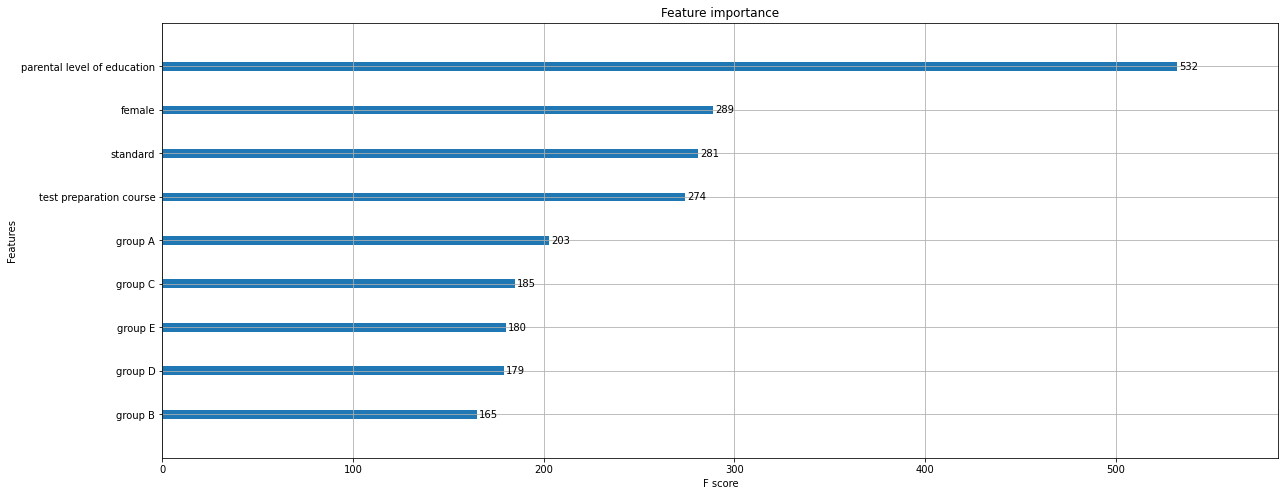

In [ ]:
ax = xgb.plot_importance(xgb_reg)
ax.figure.set_size_inches(20,8)
plt.show()

# Light GBM

In [ ]:
import lightgbm as lgb

In [ ]:
Y = df['Winsorized AVG Score']
X = df[["female","standard",'test preparation course','parental level of education',"group A","group B","group C","group D","group E"]]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 125)

In [ ]:
d_train = lgb.Dataset(X_train, label=y_train)

In [ ]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmsle',
    'max_depth': 6, 
    'learning_rate': 0.1,
    'num_leaves':128,
    'force_row_wise':True,
    'verbose': -1}
n_estimators = 100

In [ ]:
lgb_reg_model = lgb.train(params, d_train, num_boost_round = 100)
y_predict = lgb_reg_model.predict(X_test)
y_predict_train = lgb_reg_model.predict(X_train)

lgbrmse = np.sqrt(mse(y_test, y_predict))
print("RMSE of Light GBM: {:.3f}".format(lgbrmse))

RMSE of Light GBM: 12.312


# Conclusion

In [ ]:
print("RMSE of KNN: {:.2f}".format(knnrmse))
print("RMSE of Decision Tree : {:.2f}".format(rmse_dc))
print("RMSE of Random Forrest : {:.2f}".format(rmse_rf))
print("RMSE of SVR : {:.2f}".format(rmse_svr))
print("RMSE of XGBoost: {:.2f}".format(xgbrmse))
print("RMSE of Light GBM: {:.2f}".format(lgbrmse))

RMSE of KNN: 12.43
RMSE of Decision Tree : 12.53
RMSE of Random Forrest : 12.07
RMSE of SVR : 11.91
RMSE of XGBoost: 12.01
RMSE of Light GBM: 12.31


In [ ]:
#We can say that SVR is the best algorithm that we can use because of the RMSE is lesser than others. Also a better XGBoost RMSE can be found via more detailed Hyper-Parameter Tuning.